In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [22]:
from proj1_helpers import *
from data_helpers import *
from implementations import *

In [23]:
#lOAD TRAIN DATA
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [24]:
#CLEAN TRAIN DATA: delete columns with numerous undefined values
bounds = [0.0, 0.5]
tX_clean, ind_remov = treat_undefined_values(bounds, tX)
ind_remov

[4, 5, 6, 12, 26, 27, 28]

In [25]:
#MODEL BUILDING
tx, mean, std = standardize(tX_clean,0)
y, tx = build_model_data(tx,y)

In [26]:
num_samples = len(y)
num_features = tx.shape[1]

num_samples, num_features

(250000, 24)

## Ridge regression using normal equations:

### Linear regression

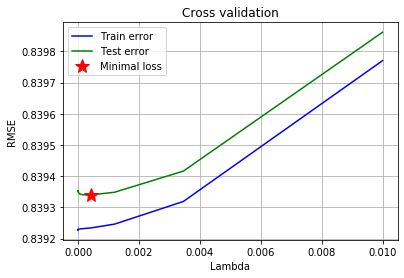

 Best value of lambda = 0.0004124626382901365 
 Loss = 0.8393400807674494 
 Weights = [-0.31440256  0.0309335  -0.25833265 -0.27093214 -0.02281768  0.27124568
 -0.03555087  0.02314085 -0.18873896  0.12465084  0.19043216 -0.00080423
 -0.00089797  0.28596836 -0.0009073   0.00228802  0.11737855  0.00081974
 -0.07359579  0.06264649  0.06562791 -0.01422376 -0.01348664 -0.08059052]


In [27]:
from cross_validation import cross_validation
from cost import compute_loss_rmse
from plots import *

lambdas = np.logspace(-20, -2, 40)
k_fold = 4
seed = 6

# prepare storage of the mean of the weights and rmse for train and test data
ws = np.zeros((num_features, len(lambdas)))
rmse_train = []
rmse_test = []

for ind, lambda_ in enumerate(lambdas):
    # prepare storage of weights and rmse for train and test data for each fold
    ws_tmp = np.zeros((num_features, k_fold))
    rmse_tr = []
    rmse_te = []
    # cross-validation
    for i,k in enumerate(range(k_fold)):
        tx_train, y_train, tx_test, y_test = cross_validation(y, tx, k, k_fold, seed)
        w,_ = ridge_regression(y_train, tx_train, lambda_)
        # store weights and rmse for train and test data for each fold
        ws_tmp[:, i] = w
        rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
        rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
    # store the mean of the weights and rmse for train and test data
    ws[:, ind] = np.mean(ws_tmp, 1)
    rmse_train.append(np.mean(rmse_tr))
    rmse_test.append(np.mean(rmse_te))
    
loss = np.amin(rmse_test)
weights = ws[:, np.argmin(rmse_test)]
lambda_star = lambdas[np.argmin(rmse_test)]


plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss)
print(" Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
    g=lambda_star, l=loss, we = weights))

### Polynomial regression

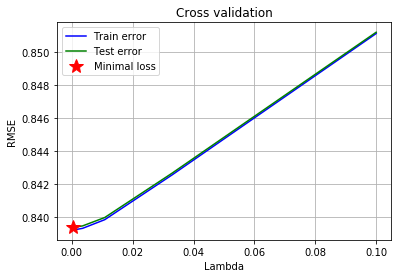

Degree=1 Best value of lambda = 0.00038566204211634724 
 Train loss = 0.8392010185272328 Test loss = 0.8393694273547523 
 Weights = [-0.31444875  0.03095718 -0.25842789 -0.27114316 -0.02282     0.2714418
 -0.03519851  0.02293546 -0.1887822   0.12460127  0.19058836 -0.00081529
 -0.00090989  0.28618533 -0.00085919  0.00225904  0.11759527  0.00079948
 -0.07385421  0.0628077   0.0669174  -0.01488909 -0.01388116 -0.08091669]


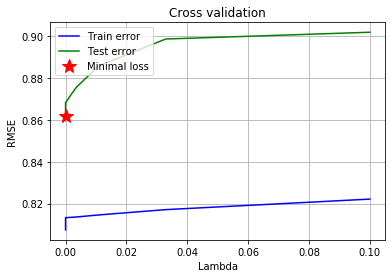

Degree=2 Best value of lambda = 3.0391953823131948e-15 
 Train loss = 0.8074174289386917 Test loss = 0.8617778859669084 
 Weights = [-1.55068902e+01  4.06181287e-02 -2.47384386e-01 -2.10585984e-01
  9.51984400e-02  2.39241882e-01 -3.22183836e-02 -3.21352448e+02
 -1.78016477e-01  5.89325277e-02  6.24622898e+01 -7.05163734e-04
  4.94479669e-04  6.15081789e+01  1.17397098e-03 -3.91421640e-04
  8.06479116e-02  1.23302366e-03 -5.40982432e-02  3.55852660e-01
  4.35470630e-01 -1.85390023e+03  1.85336784e+03  2.72237906e+02
  1.51921691e+01 -2.03201920e-02  3.27075164e-02  9.84262868e-03
 -2.72026519e-03 -5.89501811e-02  6.53233945e-03  1.05162178e-02
  1.82539342e-02  7.02341592e-02 -1.61652359e-02 -3.50334790e-02
 -2.90603636e-02 -1.97440699e-02 -6.60159803e-02 -3.77375992e-02
 -4.15500272e-03 -2.87107744e-02 -2.08233919e-02 -2.01459704e-01
 -1.74597198e-01  1.13617839e+03 -1.13560876e+03 -1.86505425e-03]


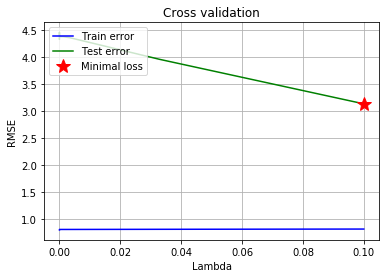

Degree=3 Best value of lambda = 0.1 
 Train loss = 0.7962299242791286 Test loss = 3.137276794599825 
 Weights = [-2.46302679e-02  3.33667601e-02 -1.75765581e-01  1.05828630e-02
  3.84032998e-02  4.33921132e-02 -3.97999135e-02  6.73237433e-02
 -1.03414702e-01  2.92870540e-02  1.49149166e-01 -1.42484272e-03
 -9.40575734e-04  2.72333746e-02  1.25902196e-03  1.24165748e-03
  3.02362639e-02  1.27153795e-03  4.72525328e-03  3.88846111e-02
 -4.76743930e-03 -1.38139432e-02 -1.38281738e-02  3.92399363e-02
 -2.46302679e-02 -5.65241514e-02  5.34356993e-02 -3.18964785e-02
  3.74462553e-02 -5.09026190e-02  1.41528745e-02 -1.20312598e-02
  2.32271689e-02  4.23525388e-02 -2.31656615e-02 -3.87248339e-02
 -7.59020889e-03 -7.15221513e-03 -6.56858305e-02 -7.37081105e-03
  2.45594765e-03 -6.05930208e-03 -3.58524857e-02  9.67398120e-03
 -1.06983938e-02 -1.88353625e-02 -1.89034174e-02 -2.17098267e-02
 -2.46302679e-02  5.64020126e-03 -2.87572563e-03  1.64173977e-03
 -3.06679997e-03  2.17820069e-02 -4.6399019

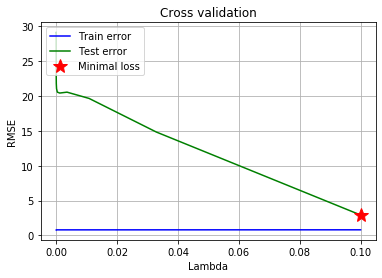

Degree=4 Best value of lambda = 0.1 
 Train loss = 0.7904793611560845 Test loss = 2.9322666731547233 
 Weights = [-2.32288805e-02  5.99917309e-02 -1.73221025e-01  2.62539405e-02
  3.63749793e-02  3.75557881e-02 -3.56180802e-02  6.20674003e-02
 -1.03273742e-01  2.84961541e-02  1.43892750e-01 -1.55248473e-03
 -5.58090723e-04  2.12281210e-02  1.14420466e-03  1.66068889e-03
  2.78571453e-02  1.48894463e-03  4.77718277e-03  3.10488019e-02
 -9.47919691e-03 -1.92217891e-02 -1.92477054e-02  3.55886935e-02
 -2.32288805e-02 -4.15949106e-02  5.07383646e-02 -8.56705786e-02
  3.81555847e-02 -4.11920765e-02  1.39856679e-02 -1.90226732e-02
  4.09936133e-02  1.76138699e-02 -3.41655622e-02 -1.79872554e-02
 -8.79231410e-03 -9.82243552e-03 -3.58268075e-02 -7.38465399e-03
  2.68562065e-02 -5.20513711e-03 -3.96876748e-02  2.56425299e-02
 -5.50865275e-03 -1.52118924e-02 -1.52980360e-02 -2.43542348e-02
 -2.32288805e-02 -5.52498817e-04 -3.54645351e-03  1.14869607e-02
 -8.38833284e-03  1.70711514e-02 -3.670245

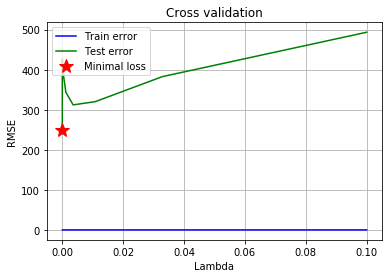

Degree=5 Best value of lambda = 2.8072162039411815e-14 
 Train loss = 0.7820558037418198 Test loss = 250.93558012745683 
 Weights = [-8.29276502e+01  3.65637007e-01 -2.89076612e-01 -2.16473480e-01
  1.29239827e-02  1.12482575e-01 -3.55905067e-02 -3.54747791e+02
 -3.81170394e-02 -1.75550549e-01  6.90713843e+01 -2.29787079e-03
 -2.78928235e-03  6.77530816e+01  2.79592208e-03  6.76138797e-03
  7.48271486e-02 -1.61703548e-03 -5.64218508e-02  1.34303125e+03
  8.70883713e+00  8.39923330e+02  5.36601041e+02  3.00720850e+02
 -1.00277224e+02 -2.29435407e-02  1.50933903e-02 -9.26762636e-02
  7.48357783e-02 -6.45592979e-02  9.42619035e-03  1.23894399e-01
  5.87118900e-02 -7.57194986e-02 -1.34934368e-01 -2.70476566e-02
 -5.32776363e-03 -6.12294781e-02 -7.71083274e-02  1.22218406e-03
  4.65697179e-02  9.12598680e-03 -6.84260794e-02  2.02636255e+03
 -1.14577100e+01 -4.04935796e+02  6.67479306e+02 -1.53864632e-01
 -9.64765081e+01 -8.01312851e-02  2.62827429e-02  3.06964213e-02
 -3.49246291e-02  2.566

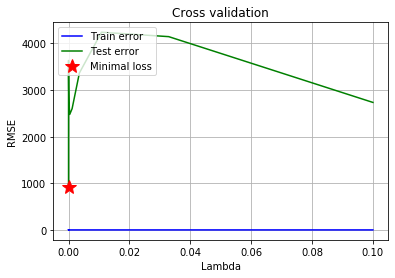

Degree=6 Best value of lambda = 1.8873918221350994e-09 
 Train loss = 0.7726298700849185 Test loss = 920.1536496785666 
 Weights = [ 3.18848808e+01  7.10714272e-01 -3.48721901e-01 -2.61552378e-01
 -1.46637125e-02  7.02999523e-02 -3.38015529e-02 -8.50917889e-01
 -2.01378560e-02 -1.75560519e-01  4.98958834e-01 -1.74224938e-03
 -1.37615845e-03  2.42806614e-01  2.59287588e-03  7.81368529e-03
  9.20355606e-02  1.62054622e-04 -5.05739233e-02  8.05375748e+00
  1.66058101e+01 -1.34475578e+02  1.87917234e+01  9.17103460e-01
  3.17980841e+01 -2.23501741e-01  5.35071005e-03 -6.96433864e-02
  6.11496206e-02 -5.00843200e-02  1.64901317e-03  1.36753948e-01
  5.98044587e-02 -8.26325310e-02 -1.42356204e-01  4.27795798e-03
 -1.15322829e-03 -7.03417006e-02 -6.23733996e-02  4.23533867e-03
  6.21325503e-02 -8.30223835e-03 -7.43733594e-02 -1.24817118e+01
 -2.67562580e+01 -1.91158694e+02 -2.18499619e+01 -1.35050135e-01
  3.17987116e+01 -1.71190710e-01  6.68833497e-02  4.24531745e-02
 -3.36826139e-02  3.2212

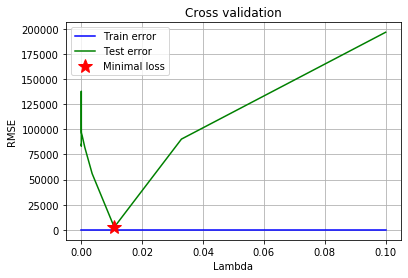

Degree=7 Best value of lambda = 0.010826367338740563 
 Train loss = 0.7665608789656244 Test loss = 2719.5479841146453 
 Weights = [-1.96902358e-02  4.77859132e-01 -3.06454526e-01 -5.95794582e-02
  2.56947866e-02  5.91724644e-02 -3.90411874e-02  1.03590409e-01
 -1.06502722e-01 -1.20600872e-03  1.82188547e-01 -8.56189094e-04
 -2.45225196e-03  6.09982999e-02  2.15432778e-03  2.15343656e-03
  9.91726978e-02 -2.33930141e-04 -3.00482114e-02  1.46865490e-02
 -1.95514608e-03 -1.45289278e-02 -1.45004293e-02  6.68967543e-02
 -1.96901821e-02 -2.93705762e-01  2.58449250e-02 -9.36134406e-02
  3.79106239e-02  1.82137913e-02  5.33329539e-03  2.60496043e-02
  8.03930850e-02  1.98052501e-02 -8.12496323e-02 -2.98007533e-03
 -4.24255742e-03 -5.80366583e-02 -4.12086665e-02 -2.73911358e-03
  5.99543994e-02 -1.91783640e-03 -7.22333487e-02  1.43487425e-02
 -8.02557390e-03 -1.29486003e-02 -1.32668548e-02 -4.00644957e-02
 -1.96902013e-02 -9.63533792e-02  4.96979298e-02  9.57399241e-03
 -4.49872534e-02  6.98000

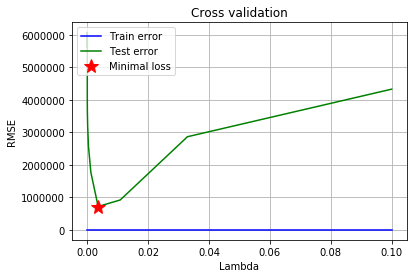

Degree=8 Best value of lambda = 0.0035622478902624516 
 Train loss = 0.7637251396925604 Test loss = 719687.9883152631 
 Weights = [-1.43838364e-02  6.60433940e-01 -3.39779186e-01 -9.78552076e-02
  2.77443991e-02  7.94685365e-02 -3.54451610e-02  1.42055454e-01
 -1.15418069e-01 -3.70045890e-02  2.18537640e-01  2.48357860e-03
 -2.51948095e-03  8.69749817e-02  1.61714416e-03  3.02592132e-03
  1.20177975e-01  2.42069496e-04 -5.06910824e-02  8.09866934e-03
 -4.98366140e-05 -1.06302821e-02 -1.04616227e-02  9.81457079e-02
 -1.43851126e-02 -4.36482542e-01  1.23328907e-02 -6.74266797e-02
  1.61551698e-02  9.73704924e-03 -2.58792347e-03  5.16648265e-02
  8.57926252e-02 -2.52207232e-03 -9.11894342e-02  9.26674395e-03
 -3.60009314e-03 -8.30756000e-02 -4.42988442e-02 -9.68805980e-04
  5.30062778e-02 -2.45764627e-03 -9.17404772e-02  7.88572567e-03
 -1.71939490e-02 -8.61257377e-03 -9.40773031e-03 -6.47142073e-02
 -1.43849073e-02 -1.21930186e-01  6.93603277e-02 -5.46157881e-02
 -5.92796230e-02  1.21953

In [28]:
from cross_validation import cross_validation
from cost import compute_loss_rmse
from plots import plot_cross_validation

degrees = 8
lambdas = np.logspace(-15, -1, 30)
k_fold = 2
seed = 6

Lambdas_star = []
Loss = []

for indices, degree in enumerate(range(1, degrees+1)):
    tx_augmented = build_poly_all_features(tx, degree)
                                                      
    # prepare storage of the mean of the weights and rmse for train and test data
    ws = np.zeros((tx_augmented.shape[1], len(lambdas)))
    rmse_train = []
    rmse_test = []
    
    for ind, lambda_ in enumerate(lambdas):
        # prepare storage of weights and rmse for train and test data for each fold
        ws_tmp = np.zeros((tx_augmented.shape[1], k_fold))
        rmse_tr = []
        rmse_te = []
        # cross-validation
        for i,k in enumerate(range(k_fold)):
            tx_train, y_train, tx_test, y_test = cross_validation(y, tx_augmented, k, k_fold, seed)
            #ridge regression
            w,_ = ridge_regression(y_train, tx_train, lambda_)
            # store weights and rmse for train and test data for each fold
            ws_tmp[:, i] = w
            rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
            rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
        # store the mean of the weights and rmse for train and test data
        ws[:, ind] = np.mean(ws_tmp, 1)
        rmse_train.append(np.mean(rmse_tr))
        rmse_test.append(np.mean(rmse_te))

    loss_train = np.amin(rmse_train)    
    loss_test = np.amin(rmse_test)
    weights = ws[:, np.argmin(rmse_test)]
    lambda_star = lambdas[np.argmin(rmse_test)]

    plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss_test)
    print("Degree={d} Best value of lambda = {g} \n Train loss = {l_tr} Test loss = {l_te} \n Weights = {we}".format(
        d=degree, g=lambda_star, l_tr=loss_train, l_te=loss_test, we = weights))
    
    Lambdas_star.append(lambda_star)
    Loss.append(loss_test)
    

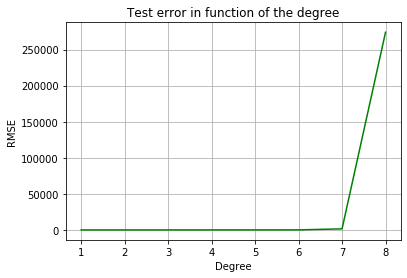

Best degree=1 Best value of lambda = 0.0001 
 Loss = 0.8503266883986379 
 Weights = [-0.31460108  0.09817915 -0.30034324 -0.07479191 -0.18568234 -0.03140919
 -0.0403931  -0.11822224  0.14557187  0.18149619 -0.00055408 -0.00234439
  0.21697569 -0.00081263  0.00203905  0.18194239  0.0010509  -0.0851646
  0.03716229  0.01790202]


In [23]:
plt.plot(range(1, degrees+1), Loss, color='g')
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("Test error in function of the degree")
plt.grid(True)
plt.show()

degree_star =  np.argmin(Loss) + 1
Loss_star = np.amin(Loss)
Lambda_star = Lambdas_star[np.argmin(Loss)]

TX_train = build_poly_all_features(tx, degree_star)
Weights_star,_ = ridge_regression(y, tx, Lambda_star)
print("Best degree={d} Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
        d=degree_star, g=Lambda_star, l=Loss_star, we = Weights_star))

In [24]:
#PREDICT TRAINING ACCURACY
training_accuracy = predict_accuracy(y,tx,Weights_star)
training_accuracy

66.0768

## Generate predictions and save ouput in csv format for submission:

In [27]:
DATA_TEST_PATH = 'data/test.csv'
ytest, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test_clean = np.delete(tX_test, ind_remove, axis=1)
_, tx_test = build_model_data(tX_test_clean,ytest)

In [28]:
OUTPUT_PATH = 'data/submission_ridge.csv'
y_pred = predict_labels(Weights_star, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)